In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('sudoku.tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#augmenter le Contrast
img = cv2.equalizeHist(image)
rows, cols = img.shape

In [3]:
def top_crop():
    for i in range(rows):
        for j in range(cols):
            if img[i,j] != 255:
                return i , j
def bottom_crop():
    for i in range(rows-1 , 0, -1):
        for j in range(cols-1, 0, -1):
            if img[i,j]!= 255:
                return i , j
start_x , start_y = top_crop()
end_x , end_y = bottom_crop()
                

-1

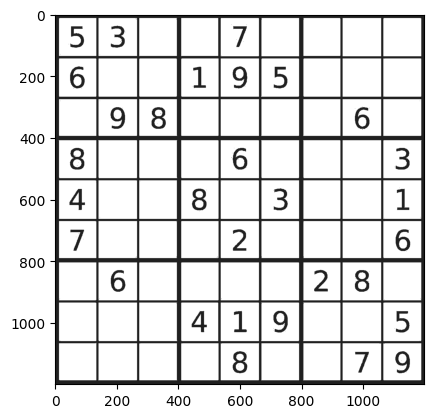

In [4]:
result = img[start_x:end_x , start_y:end_y]
plt.imshow(result, cmap='gray')
cv2.waitKey()

In [11]:
def find_num(img):
    k=0
    r,c = img.shape
    centerr_y = c//2
    centerr_x = r//5
    for i in range(centerr_x , r-centerr_x):
        if img[i,centerr_y] != 255:
            k+=1
    return k        

In [12]:
w, h = result.shape
li = w//9
lj = h//9

count = 1
for i in range(0,w,li):
    for j in range(0,h,lj):
        #part_img = result[int(i)+12:int(i+li)-12 , int(j)+12:int(j+lj)-12]
        part_img = result[i:i+li , j:j+lj]
        if part_img.shape == (li,lj):
            k = find_num(part_img)
            if k > 4 :
                cv2.imwrite('output_img/pic'+str(count)+'.jpg', part_img)
                count += 1